# Quick Overview

Here you can find some quick examples of what you can do with segysak. For more details refer to the [examples](../examples.html).

The library is imported as *segysak* and the loaded `xarray` objects are compatible with *numpy* and *matplotlib*.

The cropped volume from the Volve field in the North Sea (made available by Equinor) is used for this example, and
all the examples and data in this documentation are available from the `examples` folder of the
[Github](https://github.com/trhallam/segysak) respository.

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import pathlib

In [3]:
V3D_path = pathlib.Path("dados/buzios_corte_tempo.sgy")
print("3D", V3D_path, V3D_path.exists())

3D dados\buzios_corte_tempo.sgy True


## Scan SEG-Y headers


A basic operation would be to check the text header included in the SEG-Y file. The *get_segy_texthead*
function accounts for common encoding issues and returns the header as a text string.

In [4]:
from segysak.segy import get_segy_texthead

get_segy_texthead(V3D_path)

Text HeaderC 1 3D VOLUME
C 2 HEADER BYTE LOCATIONS AND TYPES:
C 3     3D INLINE : 189-192 (4-BYTE INT)    3D CROSSLINE: 193-196 (4-BYTE INT)
C 4     ENSEMBLE X: 181-184 (4-BYTE INT)    ENSEMBLE Y  : 185-188 (4-BYTE INT)
C 5
C 6 SAMPLES/TRACE     :         24
C 7 SAMPLE INTERVAL   :       4000 microseconds
C 8 FIRST SAMPLE AT   :       4948 ms
C 9 VERTICAL DIMENSION: TWT (ms)
C10 SAMPLE RECORDING FORMAT: IBM FLOATING POINT (4-BYTE)
C11 X/Y Min/Max       : X:741280.14-767058.81 Y:7249472.95-7277339.93
C12
C13
C14
C15
C16
C17
C18
C19
C20
C21
C22
C23
C24
C25
C26
C27
C28
C29
C30
C31
C32
C33
C34
C35
C36
C37
C38 WRITTEN BY DUG INSIGHT VERSION 5.1 (403262)             http://www.dug.com/
C39 SEG Y REV1
C40 END TEXTUAL HEADER

If you need to investigate the trace header data more deeply, then *segy_header_scan* can be used to report
basic statistics of each byte position for a limited number of traces.

*segy_header_scan* returns a `pandas.DataFrame`. To see the full DataFrame use the `pandas` option_context manager.

In [5]:
from segysak.segy import segy_header_scan

scan = segy_header_scan(V3D_path)
scan

  0%|          | 0.00/1.00k [00:00<?, ? traces/s]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
TRACE_SEQUENCE_FILE,5,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
FieldRecord,9,1000.0,4004.713,0.699371,4004.0,4004.00,4005.0,4005.00,4006.0
TraceNumber,13,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
EnergySourcePoint,17,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...
SourceEnergyDirectionMantissa,219,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceEnergyDirectionExponent,223,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementMantissa,225,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementExponent,229,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0


The header report can also be reduced by filtering blank byte locations. Here we use the standard deviation `std`
to filter away blank values which can help us to understand the composition of the data.

For instance, key values like **trace UTM coordinates** are located in bytes *73* for X & *77* for Y. We
can also see the byte positions of the **local grid** for INLINE_3D in byte *189* and for CROSSLINE_3D in byte *193*.

In [6]:
scan[scan["std"] > 0]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,5.005000e+02,288.819436,1.0,250.75,500.5,750.25,1000.0
TRACE_SEQUENCE_FILE,5,1000.0,5.005000e+02,288.819436,1.0,250.75,500.5,750.25,1000.0
FieldRecord,9,1000.0,4.004713e+03,0.699371,4004.0,4004.00,4005.0,4005.00,4006.0
CDP,21,1000.0,2.344627e+03,127.055519,2150.0,2233.00,2330.5,2455.25,2580.0
SourceX,73,1000.0,7.533640e+06,5933.330036,7522576.0,7528456.75,7534290.5,7538875.25,7542950.0
SourceY,77,1000.0,7.253592e+07,14733.694317,72513252.0,72522976.25,72534257.0,72548765.00,72563273.0
CDP_X,181,1000.0,7.533653e+06,5933.638623,7522588.0,7528469.75,7534303.5,7538888.25,7542964.0
CDP_Y,185,1000.0,7.253593e+07,14733.458065,72513264.0,72522988.00,72534268.5,72548776.75,72563285.0
INLINE_3D,189,1000.0,4.004713e+03,0.699371,4004.0,4004.00,4005.0,4005.00,4006.0
CROSSLINE_3D,193,1000.0,2.344627e+03,127.055519,2150.0,2233.00,2330.5,2455.25,2580.0


To retreive the raw header content use `segy_header_scrape`. Setting `partial_scan=None` will return the
full dataframe of trace header information.

In [7]:
from segysak.segy import segy_header_scrape

scrape = segy_header_scrape(V3D_path, partial_scan=1000)
scrape

  0%|          | 0.00/1.00k [00:00<?, ? traces/s]

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,TransductionConstantPower,TransductionUnit,TraceIdentifier,ScalarTraceHeader,SourceType,SourceEnergyDirectionMantissa,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit
0,1,1,4004,0,0,2150,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,4004,0,0,2151,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,4004,0,0,2152,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,4004,0,0,2153,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5,4004,0,0,2154,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,996,4006,0,0,2287,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
996,997,997,4006,0,0,2288,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
997,998,998,4006,0,0,2289,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
998,999,999,4006,0,0,2290,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Load SEG-Y data

All SEG-Y (2D, 2D gathers, 3D & 3D gathers) are ingested into `xarray.Dataset` objects through the
`segy_loader` function. It is best to be explicit about the byte locations of key information but
`segy_loader` can attempt to guess the shape of your dataset. Some standard byte positions are
defined in the `well_known_bytes` function and others can be added via pull requests to the Github
repository if desired.

In [8]:
from segysak.segy import segy_loader, well_known_byte_locs

V3D = segy_loader(V3D_path, iline=189, xline=193, cdpx=73, cdpy=77, vert_domain="TWT")
V3D

  0%|          | 0.00/73.3k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is INLINE_3D


Converting SEGY:   0%|          | 0.00/73.3k [00:00<?, ? traces/s]

<xarray.Dataset>
Dimensions:  (iline: 172, xline: 429, twt: 24)
Coordinates:
  * iline    (iline) uint16 4004 4005 4006 4007 4008 ... 4172 4173 4174 4175
  * xline    (xline) uint16 2150 2151 2152 2153 2154 ... 2577 2578 2579 2580
  * twt      (twt) float64 4.948e+03 4.952e+03 4.956e+03 ... 5.036e+03 5.04e+03
    cdp_x    (iline, xline) float32 7.542e+05 7.542e+05 ... 7.562e+05 7.562e+05
    cdp_y    (iline, xline) float32 7.251e+06 7.251e+06 ... 7.258e+06 7.258e+06
Data variables:
    data     (iline, xline, twt) float32 0.1019 0.2756 ... -0.01059 0.5266
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C 1 3D VOLUME\nC 2 HEADER BYTE LOCATIONS AND TYPES:\...
    measurement_system:  0
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         buzios_corte_tempo.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-0.7709436503262265, -0.7692768242923893, -0.647411...
    coord_scalar:        -10.0

## Visualising data

`xarray` objects use smart label based indexing techniques to retreive subsets of data. More
details on `xarray` techniques for *segysak* are covered in the examples, but this demonstrates
a general syntax for selecting data by label with `xarray`. Plotting is done by `matploblib` and
`xarray` selections can be passed to normal `matplotlib.pyplot` functions.

Text(0.5, 0, 'XLINE')

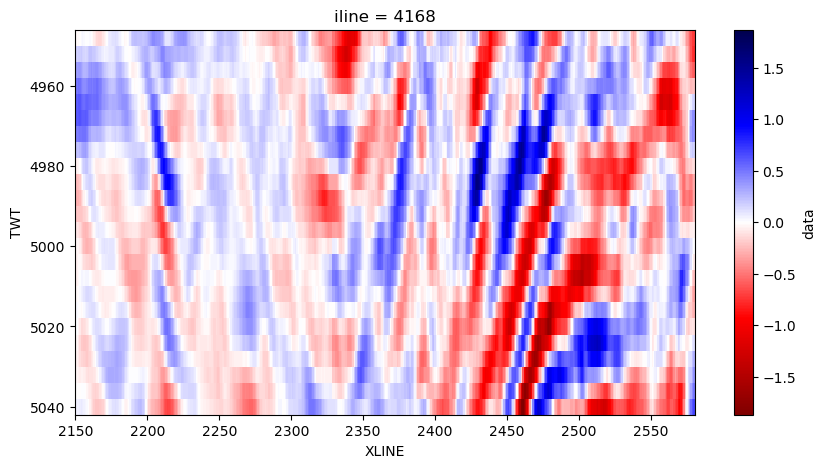

In [9]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 5))
iline_sel = 4168
V3D.data.transpose("twt", "iline", "xline", transpose_coords=True).sel(
    iline=iline_sel
).plot(yincrease=False, cmap="seismic_r")
#plt.grid("grey")
plt.ylabel("TWT")
plt.xlabel("XLINE")
#plt.savefig('seismic_depth_4480.png')

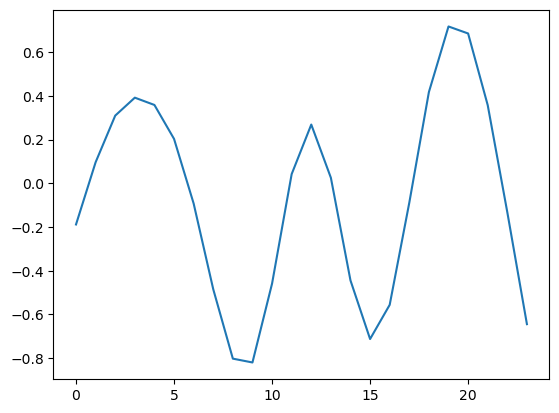

In [15]:
plt.plot(V3D.data.sel(
    iline=iline_sel,xline=2525
).data)

In [24]:
import pickle
import lasio
import numpy as np

In [19]:
with open('model_linearreg_phi.pkl','rb') as f:
   regr_lr = pickle.load(f)

In [23]:
well12 = lasio.read('dados/8buz20rjs.las') #Amarracao com a sismica disponivel

In [25]:
data12 = well12
rho12 = np.array(data12['BRDENS'])
dtp12 = np.array(data12['BRDTP'])
phi12 = np.array(data12['BRNEUT'])
twt12 = np.array(data12['TWT'])
z12 = data12.index

vp12 = (10**3/dtp12)*0.3048 #km/s

In [38]:
idx = (twt12>4948)*(twt12<5040)
imp12 = vp12 * rho12
imp12_hat = regr_lr.predict(phi12[idx].reshape(-1, 1))

In [46]:
np.sum(idx)

1565

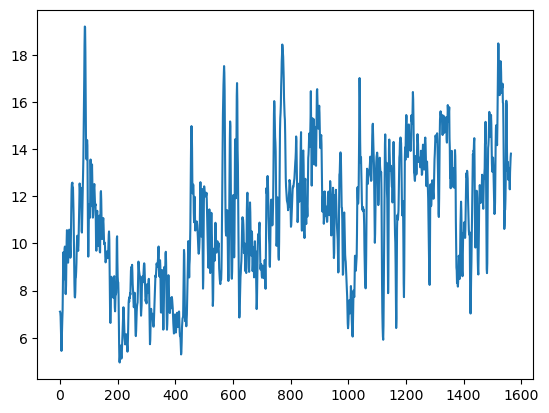

In [39]:
plt.plot(phi12[idx])

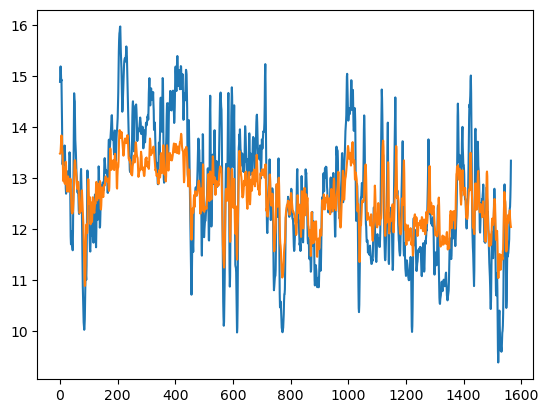

In [44]:
plt.plot(imp12[idx])
plt.plot(imp12_hat)

In [45]:
def wav(f, n, dt, t0):
    T = dt * (np.floor(n /2))
    t = np.linspace(-T, T, n)
    tau = t - t0
    s = (1 - 2 * tau**2 * f**2 * np.pi**2) * np.exp(-tau**2 * np.pi**2 * f**2)
    return s, t

In [54]:
wvlt, tt = wav(f = 40, n = 60, dt = 7e-4, t0 = 0)
tt

array([-0.021     , -0.02028814, -0.01957627, -0.01886441, -0.01815254,
       -0.01744068, -0.01672881, -0.01601695, -0.01530508, -0.01459322,
       -0.01388136, -0.01316949, -0.01245763, -0.01174576, -0.0110339 ,
       -0.01032203, -0.00961017, -0.00889831, -0.00818644, -0.00747458,
       -0.00676271, -0.00605085, -0.00533898, -0.00462712, -0.00391525,
       -0.00320339, -0.00249153, -0.00177966, -0.0010678 , -0.00035593,
        0.00035593,  0.0010678 ,  0.00177966,  0.00249153,  0.00320339,
        0.00391525,  0.00462712,  0.00533898,  0.00605085,  0.00676271,
        0.00747458,  0.00818644,  0.00889831,  0.00961017,  0.01032203,
        0.0110339 ,  0.01174576,  0.01245763,  0.01316949,  0.01388136,
        0.01459322,  0.01530508,  0.01601695,  0.01672881,  0.01744068,
        0.01815254,  0.01886441,  0.01957627,  0.02028814,  0.021     ])

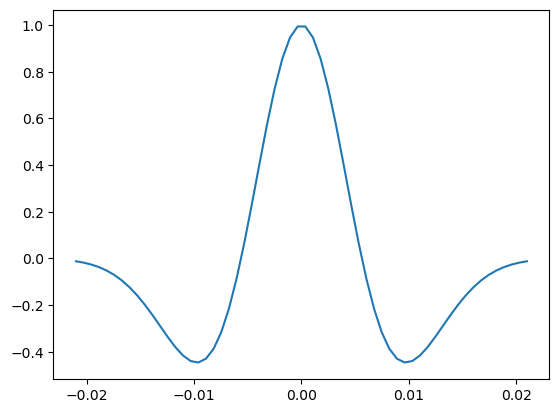

In [55]:
plt.plot(tt, wvlt)

In [56]:
def RC_fwd(imp1, imp2):
    return (imp2 - imp1) / (imp2 + imp1)

In [74]:
imp12[idx].shape

(1565,)

In [76]:
imp12_clean = imp12[idx].reshape(-1, 1)
Rpp = RC_fwd(imp12_clean[:-1], imp12_clean[1:])
Rpplast = 0.0 / imp12_clean[0,:]
Rpp = np.concatenate([Rpp, np.expand_dims(Rpplast, axis = 1)], axis = 1)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1564 and the array at index 1 has size 1

(1564,)

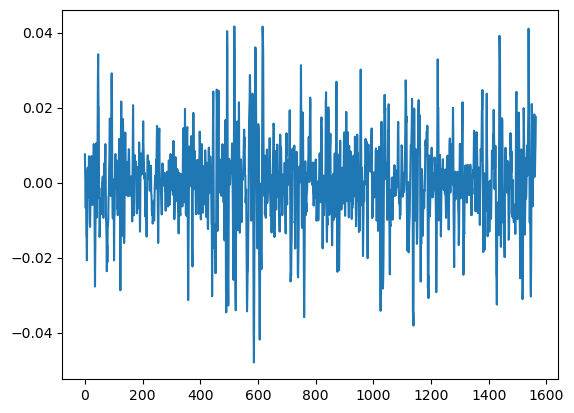

In [68]:
plt.plot(Rpp)
Rpp.shape

In [78]:
kernel_wvlt = wvlt.reshape(wvlt.shape[0], 1, 1)
RC0 = Rpp.reshape(Rpp.shape[0], 1, 1)